# IPL Exploratory Data Analysis
                                    By:Dnyandeep Dhok

In [1]:
import numpy as np
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
match_df = pd.read_csv('matches.csv')

In [4]:
ball_df = pd.read_csv('deliveries.csv')

In [5]:
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
ball_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [10]:
ball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# THE MOST SUCCESSFUL TEAMS

In [49]:
match_df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

<AxesSubplot:xlabel='count', ylabel='winner'>

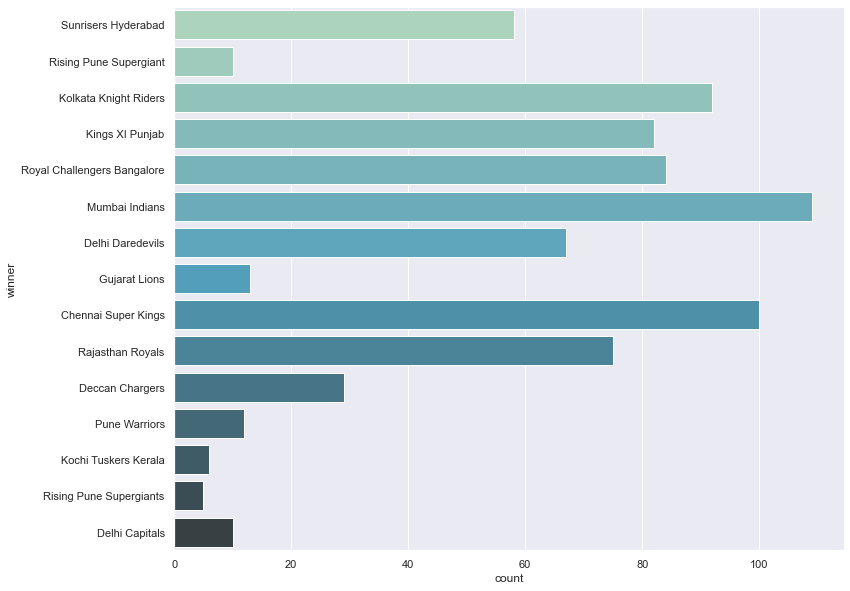

In [44]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,10))
sns.countplot(y='winner',data=match_df,palette='GnBu_d')

The most successful teams can be examined by looking at the number of matches they have won and above graph exactly shows the number of matches won by each team.

By analyzing this countplot the most successful teams are:
"Mumbai Indians", "Chennai Superkings" & "Kolkata Knight Riders"


<AxesSubplot:xlabel='count', ylabel='winner'>

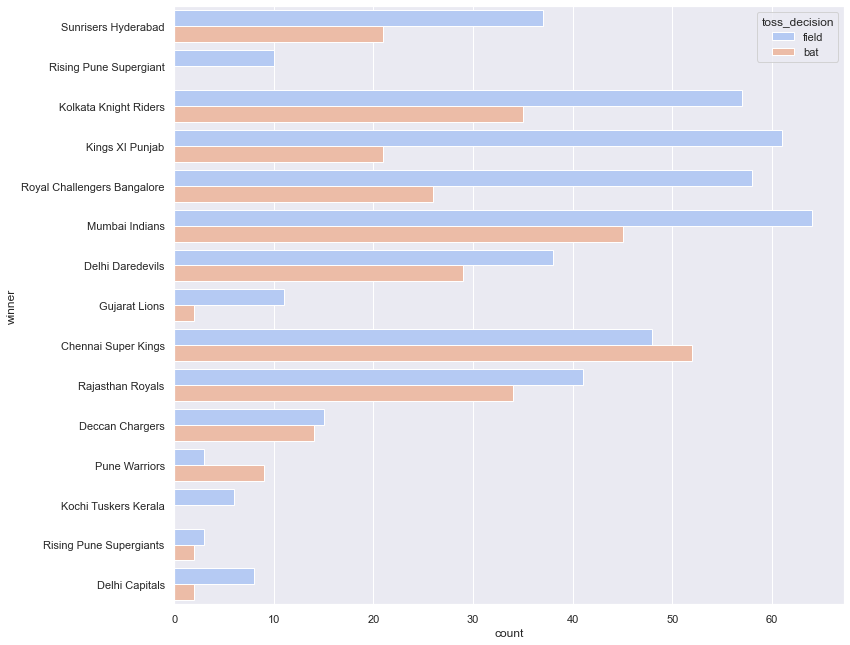

In [48]:
plt.figure(figsize=(12,11))
sns.countplot(y='winner',data=match_df,palette='coolwarm',hue='toss_decision')

From this counplot we can also see that which teams won most while fielding first and while batting first.

# MOST SUCCESSFUL PLAYERS & FACTORS CONTRIBUTING WIN OR LOSE OF A TEAM

In [22]:
succ_players = pd.DataFrame(data=match_df['player_of_match'].value_counts())
succ_players.head(5)

,player_of_match
CH Gayle,21
AB de Villiers,20
RG Sharma,17
DA Warner,17
MS Dhoni,17


From this analysis we can comfortably say that this are the most successful players of the Indian Premier League.

In [48]:
toss_df=pd.DataFrame(match_df['toss_winner'] == match_df['winner'])

In [54]:
toss_df.value_counts()

True     393
False    363
dtype: int64

<AxesSubplot:xlabel='0', ylabel='count'>

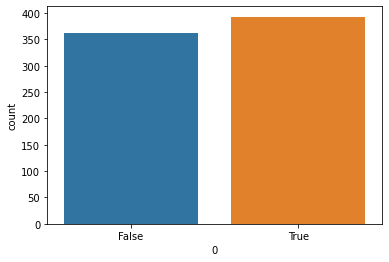

In [55]:
sns.countplot(x=0,data=toss_df)

<AxesSubplot:xlabel='count', ylabel='winner'>

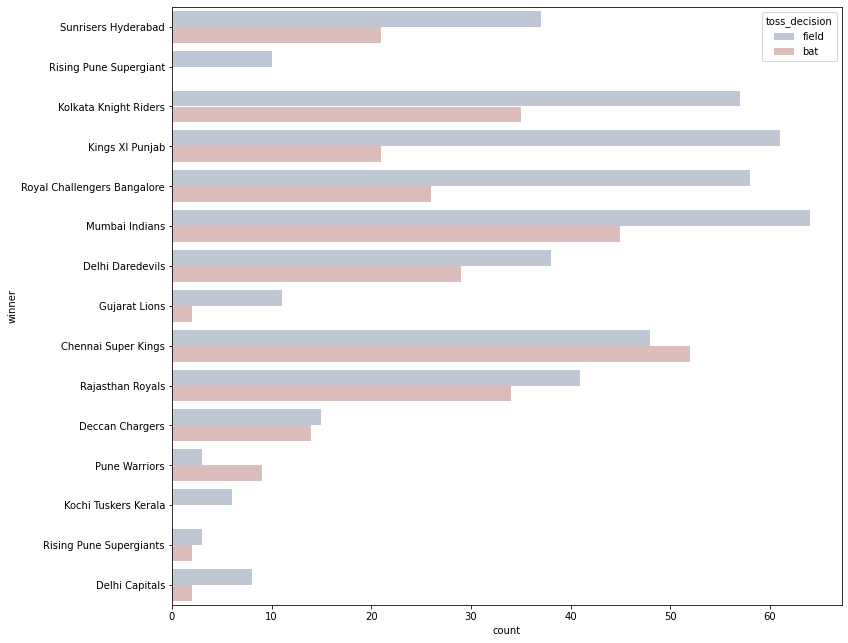

In [56]:
plt.figure(figsize=(12,11))
sns.countplot(y='winner',data=match_df,palette='vlag',hue='toss_decision')

In [58]:
match_df['venue'].value_counts()

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [34]:
ball_df.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [75]:
ball_df.dropna(inplace=True)
ball_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
165,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,7,3,CH Gayle,TM Head,DJ Hooda,0,...,0,0,0,0,0,0,0,CH Gayle,caught,DA Warner
199,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,12,4,KM Jadhav,TM Head,MC Henriques,0,...,0,0,0,0,1,0,1,KM Jadhav,run out,BCJ Cutting


In [112]:
ball_df.drop('match_id',axis=1,inplace=True)

In [124]:
ball_df.set_index('batting_team')
a=ball_df.groupby('batting_team',axis=0)
a.mean()

,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
batting_team,,,,,,,,,,,,
Chennai Super Kings,1.453416,12.381988,3.551242,0.001553,0.004658,0.0,0.000000,0.000000,0.0,0.040373,0.004658,0.045031
Deccan Chargers,1.406250,12.693182,3.519886,0.000000,0.000000,0.0,0.000000,0.002841,0.0,0.048295,0.002841,0.051136
Delhi Capitals,1.602564,12.666667,3.653846,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.025641,0.000000,0.025641
Delhi Daredevils,1.542857,11.381429,3.721429,0.001429,0.005714,0.0,0.000000,0.000000,0.0,0.035714,0.005714,0.041429
Gujarat Lions,1.492188,12.304688,3.476562,0.000000,0.007812,0.0,0.000000,0.000000,0.0,0.046875,0.007812,0.054688
Kings XI Punjab,1.432331,11.863409,3.661654,0.001253,0.005013,0.0,0.000000,0.000000,0.0,0.038847,0.005013,0.043860
Kochi Tuskers Kerala,1.350877,12.561404,3.877193,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.087719,0.000000,0.087719
Kolkata Knight Riders,1.476510,11.955705,3.629530,0.004027,0.008054,0.0,0.002685,0.000000,0.0,0.045638,0.010738,0.056376
Mumbai Indians,1.437192,12.609606,3.655172,0.002463,0.004926,0.0,0.000000,0.000000,0.0,0.040640,0.004926,0.045567


In [125]:
b=ball_df.groupby('batting_team',axis=0)
b.std()

,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
batting_team,,,,,,,,,,,,
Chennai Super Kings,0.501324,5.843744,1.769497,0.039406,0.068146,0.0,0.000000,0.000000,0.0,0.196985,0.068146,0.207533
Deccan Chargers,0.491831,5.874971,1.763722,0.000000,0.000000,0.0,0.000000,0.053300,0.0,0.214695,0.053300,0.220589
Delhi Capitals,0.492535,5.796700,1.711891,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.159085,0.000000,0.159085
Delhi Daredevils,0.507052,6.041009,1.795989,0.037796,0.075431,0.0,0.000000,0.000000,0.0,0.193260,0.075431,0.206471
Gujarat Lions,0.501903,5.831706,1.835627,0.000000,0.088388,0.0,0.000000,0.000000,0.0,0.246531,0.088388,0.260484
Kings XI Punjab,0.503247,6.036704,1.780505,0.035400,0.070666,0.0,0.000000,0.000000,0.0,0.205922,0.070666,0.216812
Kochi Tuskers Kerala,0.481487,6.378025,1.783558,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.285401,0.000000,0.285401
Kolkata Knight Riders,0.507787,6.152578,1.777151,0.063372,0.089440,0.0,0.051778,0.000000,0.0,0.215178,0.103137,0.236553
Mumbai Indians,0.501289,5.895017,1.797192,0.049599,0.070056,0.0,0.000000,0.000000,0.0,0.215488,0.070056,0.225704


From above analysis we can conclude the factors contributing in win or lose of a team
1) Toss: The team which wins the toss has won more Matches.
2) Toss Decision: The Team which elected to field first has won more than Batting first.
3) Home Ground: The home team has won more than the away team.
4) Powerplay: Whichever team lose wickets in powerplay(i.e 1st-6th over) is more likely to lose the match.

# ENDORSEMENT

In [25]:
match_df[match_df['season']==2017]['player_of_match'].value_counts().head()

BA Stokes          3
NM Coulter-Nile    3
RV Uthappa         2
JD Unadkat         2
KH Pandya          2
Name: player_of_match, dtype: int64

In [28]:
match_df[match_df['season']==2016]['player_of_match'].value_counts().head()

V Kohli           5
AB de Villiers    4
RG Sharma         4
AD Russell        3
DA Warner         3
Name: player_of_match, dtype: int64

In [29]:
match_df[match_df['season']==2015]['player_of_match'].value_counts().head()

DA Warner         4
A Nehra           3
AM Rahane         3
AD Russell        3
AB de Villiers    2
Name: player_of_match, dtype: int64

In [30]:
match_df[match_df['season']==2014]['player_of_match'].value_counts().head()

GJ Maxwell        4
RV Uthappa        3
Sandeep Sharma    3
RA Jadeja         3
DR Smith          3
Name: player_of_match, dtype: int64

<AxesSubplot:xlabel='count', ylabel='winner'>

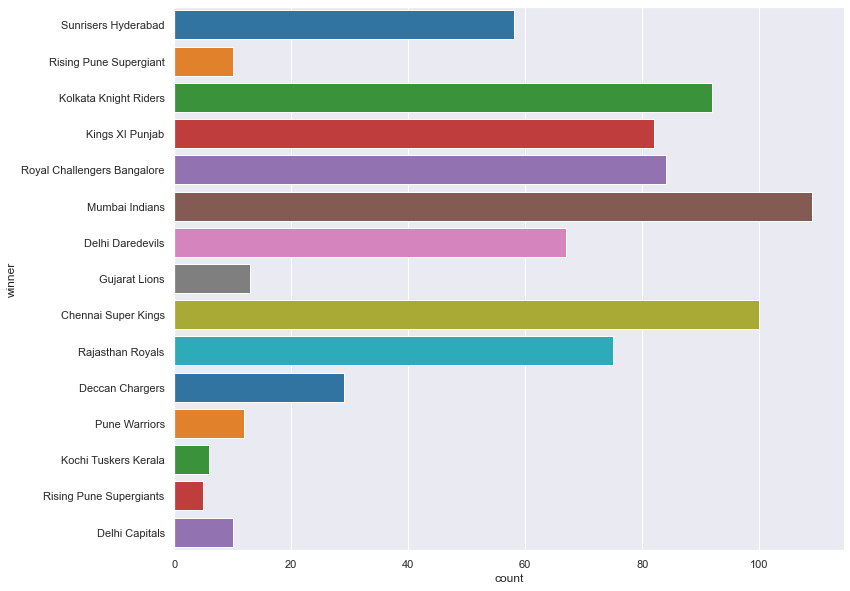

In [32]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,10))
sns.countplot(y='winner',data=match_df,palette='tab10')

The company wants popular players among the public to endorse their products & popular players can be judged by the number of player of the match they have won in recent seasons. Those players are:-

1) Virat Kohli
2) AB devilliers
3) David Warner
4) Chris Gayle
5) Ben Stokes
6) Rohit Sharma
7) Glenn Maxwell

The Teams Companies could look to endorse are:
1) Chennai Superkings
2) Mumbai Indians
3) Royal Challengers Bangalore
4) Kolkata Knight Riders